# Deutsch-Josza Algorithm
## 1. Introduction
### 1.1 Statement of problem
Suppose there is a hidden Boolean function $f$, which takles as input a string of bits, and returns either 0 or 1. the Boolean function will be called balanced if it returns 0 for half of the inputs and 1 for other half of the inputs. It is called balanced if it always returns either 0 or 1. The problem is to determine whether the given Boolean function is balanced or constant.

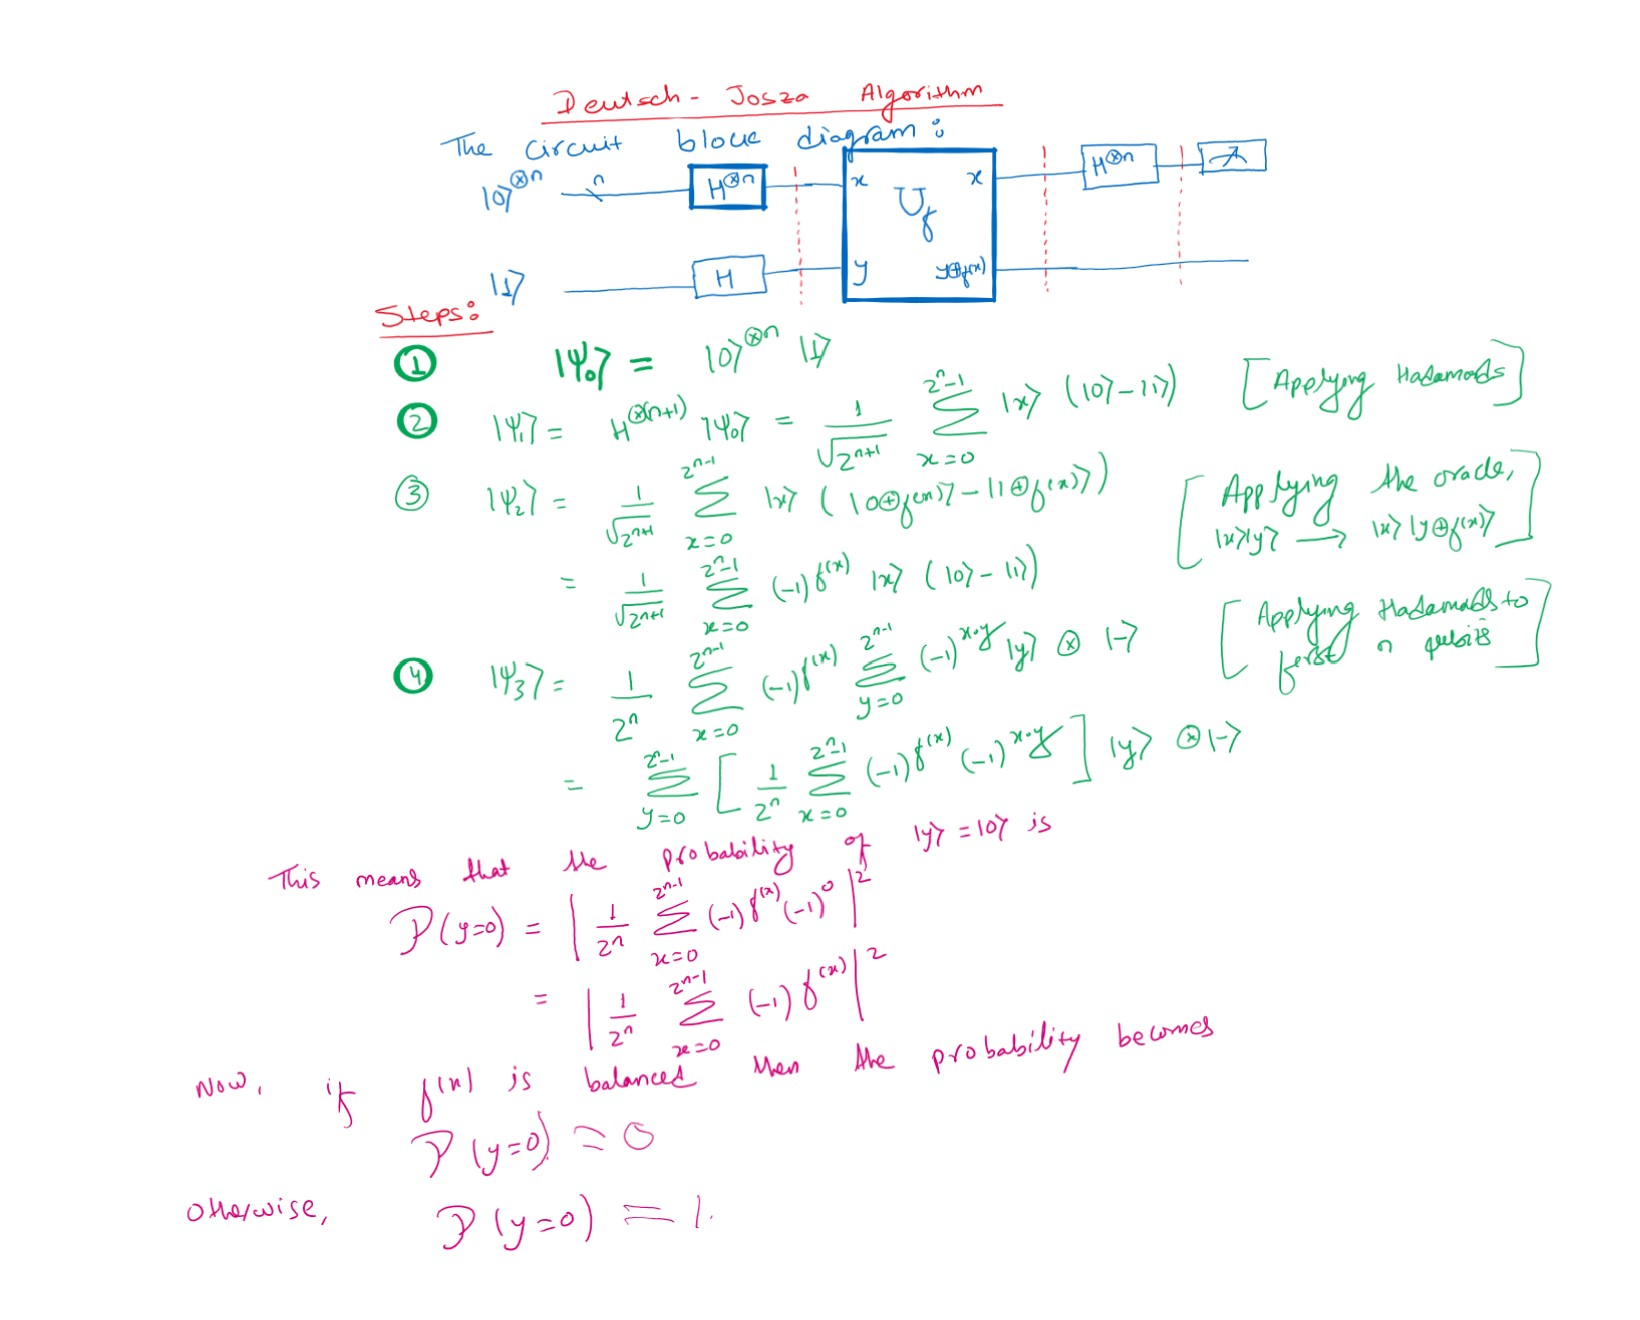

## 2. Creating Quantum Oracles

In [1]:
# Initial Imports
import numpy as np

# Importing Qiskits
from qiskit import IBMQ, QuantumCircuit, execute, BasicAer
from qiskit.providers.ibmq import least_busy

# importing visualizatuion tools
from qiskit.visualization import plot_histogram

In [106]:
def dj_oracle(n,type="constant"):
    """It is a quantum oracle. Takes n+1 number of qubits. Type is whether it is constant or balanced."""
    oracle_qc=QuantumCircuit(n+1)
    if type=="balanced": #this is for balanced oracle
        
        #this is control string for the balanced oracle
        b = np.random.randint(1,2**n)
        control_str = format(b,'0'+str(n)+'b' )
        
        #place X-gates according to the control string (initiating)
        for qubit in range(len(control_str)):
            if control_str[qubit] == '1':
                oracle_qc.x(qubit)      
        
        # actual part of control
        for qubit in range(n):
            oracle_qc.cx(qubit,n)
                
        #place X-gates according to the control string (finalizing)
        for qubit in range(len(control_str)):
            if control_str[qubit] == '1':
                oracle_qc.x(qubit)
    else: # this is for constant oracle
        output=np.random.randint(2)
        if output==1:
            oracle_qc.x(n)
            
    #display(oracle_qc.draw('mpl'))
    
    #connecting to dj algorithm
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display it in circuit
    return oracle_gate
            

## 3. Deutsch-Josza Algorithm Circuit

In [95]:
def dj_algorithm(oracle,n):
    
    dj_circuit = QuantumCircuit(n+1,n)
    
    #initial set up
    dj_circuit.x(n)
    dj_circuit.barrier()
    
    #Apply Hadamard Gates
    for qubit in range(n+1):
        dj_circuit.h(qubit)
    
    # Appending the oracle
    dj_circuit.append(oracle,range(n+1))
    
    # Apply Hadamard Gates
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.barrier()
    # Measurement
    for i in range(n):
        dj_circuit.measure(i,i)
        
    return dj_circuit

## 4. Running algorithm using Simulator

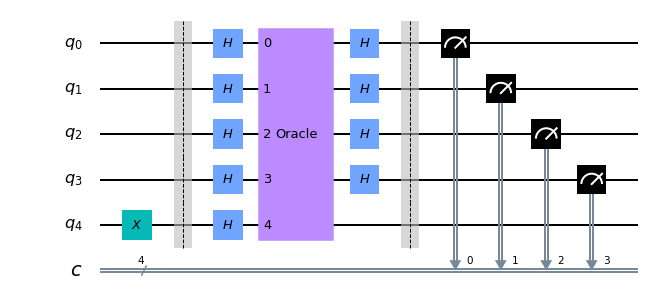

In [124]:
n=4
oracle = dj_oracle(n, "balanced")
dj_circuit = dj_algorithm(oracle,n)
dj_circuit.draw('mpl')

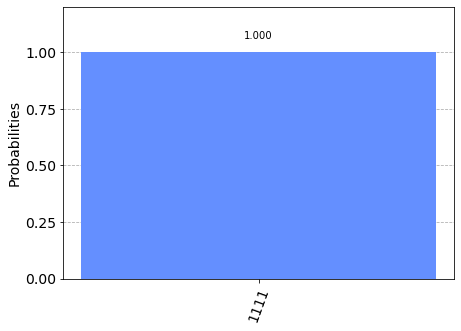

In [125]:
results = execute(dj_circuit,BasicAer.get_backend('qasm_simulator')).result()
counts = results.get_counts()
plot_histogram(counts)

## 5. Running Algorithm Using Real IBM QC

In [127]:
IBMQ.load_account()
provider= IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [130]:
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ",backend)

least busy backend:  ibmq_16_melbourne


In [133]:
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level = 3)
job_monitor(job, interval = 2)

Job Status: job has successfully run


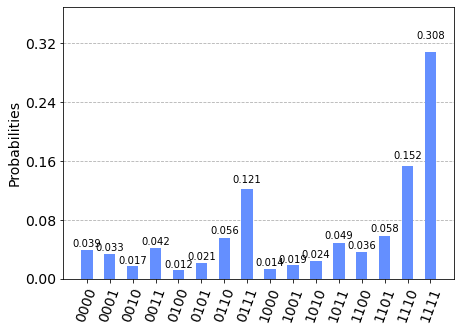

In [134]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

## Problems
In what follows, we will use the given oracles in qiskit and figure out whether it is constant or balanced.

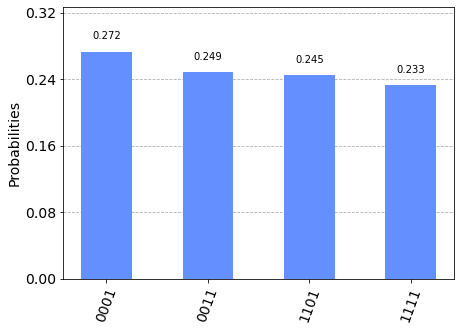

In [143]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(3)
n=4
dj_circuit = dj_algorithm(oracle,n)
results = execute(dj_circuit,BasicAer.get_backend('qasm_simulator')).result()
counts = results.get_counts()
plot_histogram(counts)